In [21]:
import json
import random

plan = "fm2_llama3.1_8b_20instances_seed0"
uids = 10
queue_data = []
for uid in range(uids):
    queue_data.append(json.load(open(f"../web/baked_queues/{plan}_{uid:0>3}.json")))
print(f"Loaded {len(sum(queue_data, []))} claim-assistance pairs")

Loaded 200 claim-assistance pairs


In [22]:
for i in range(10):
    llm_acc = sum([d["llm_is_correct"] for d in queue_data[i]]) / len(queue_data[i])
    print(f"Queue {i}: {llm_acc:.0%} accuracy")

Queue 0: 75% accuracy
Queue 1: 70% accuracy
Queue 2: 65% accuracy
Queue 3: 85% accuracy
Queue 4: 70% accuracy
Queue 5: 75% accuracy
Queue 6: 80% accuracy
Queue 7: 70% accuracy
Queue 8: 80% accuracy
Queue 9: 50% accuracy


% positive labels: 0.35
% positive predictions: 0.625
% correct predictions: 0.695


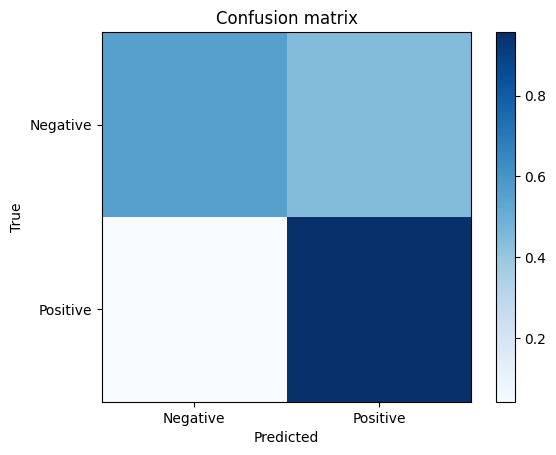

In [10]:
llm_predictions = [x['llm_prediction'] for x in sum(queue_data, [])]
gt_labels = [x['gt_label'] for x in sum(queue_data, [])]
llm_correctness = [x['llm_is_correct'] for x in sum(queue_data, [])]
print(f"% positive labels:", sum(gt_labels) / len(gt_labels))
print(f"% positive predictions:", sum(llm_predictions) / len(llm_predictions))
print(f"% correct predictions:", sum(llm_correctness) / len(llm_correctness))

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

cm = confusion_matrix(gt_labels, llm_predictions)
cm = cm / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()


In [11]:
confusion_matrix(gt_labels, llm_predictions)

array([[72, 58],
       [ 3, 67]])

In [19]:
llm_confidences = [int(x['llm_confidence'].strip('%'))/100 for x in sum(queue_data, [])]
for i in np.linspace(0.5, 0.9, 5):
    conf_lower = i
    conf_upper = i + 0.1 if i < 0.9 else 1.01
    bin_confidences = [x for x in llm_confidences if conf_lower <= x < conf_upper]

    print(f"Confidence range: {conf_lower:.1f}-{conf_upper:.1f}, {len(bin_confidences)} instances")

Confidence range: 0.5-0.6, 33 instances
Confidence range: 0.6-0.7, 44 instances
Confidence range: 0.7-0.8, 45 instances
Confidence range: 0.8-0.9, 42 instances
Confidence range: 0.9-1.0, 36 instances
